In [46]:

#1. Data Exploration and Preprocessing
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\user\Downloads\blogs (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Data Exploration
print("\nDataset Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

# Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(text.split())  # Remove extra whitespace
    return text

df['Cleaned_Text'] = df['Data'].apply(preprocess_text)

# Show a sample of cleaned text
print("\nSample of cleaned text:")
print(df[['Data', 'Cleaned_Text']].head())


First few rows of the dataset:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Dataset Description:
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantal

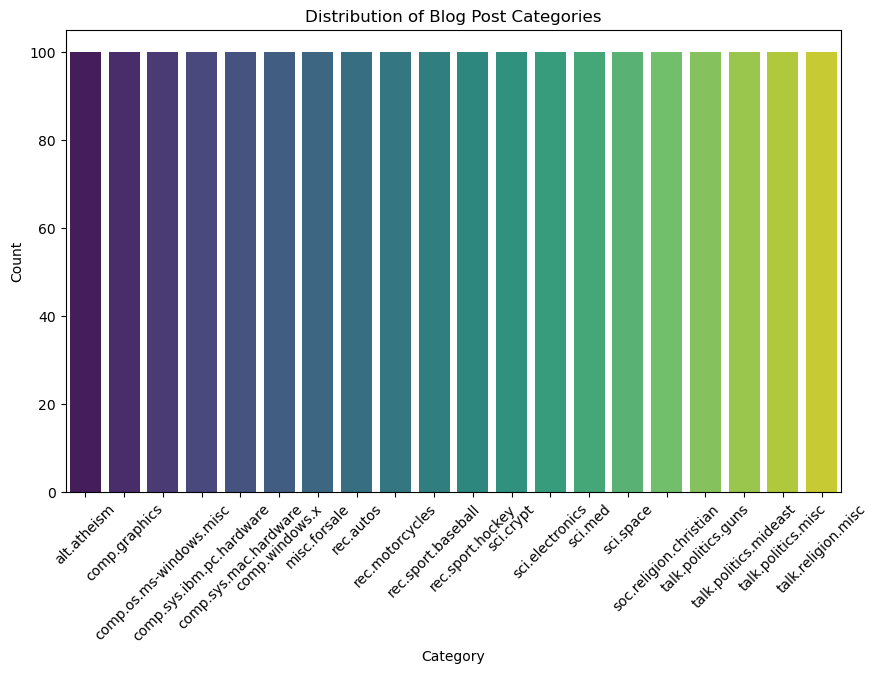

In [47]:
# Distribution of blog post categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Labels', palette='viridis')
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [48]:
#2. Naive Bayes Model for Text Classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Labels']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classification
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)



Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.93      0.88      0.90        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.67      0.88      0.76        16
                 sci.med       0.88      0.88      

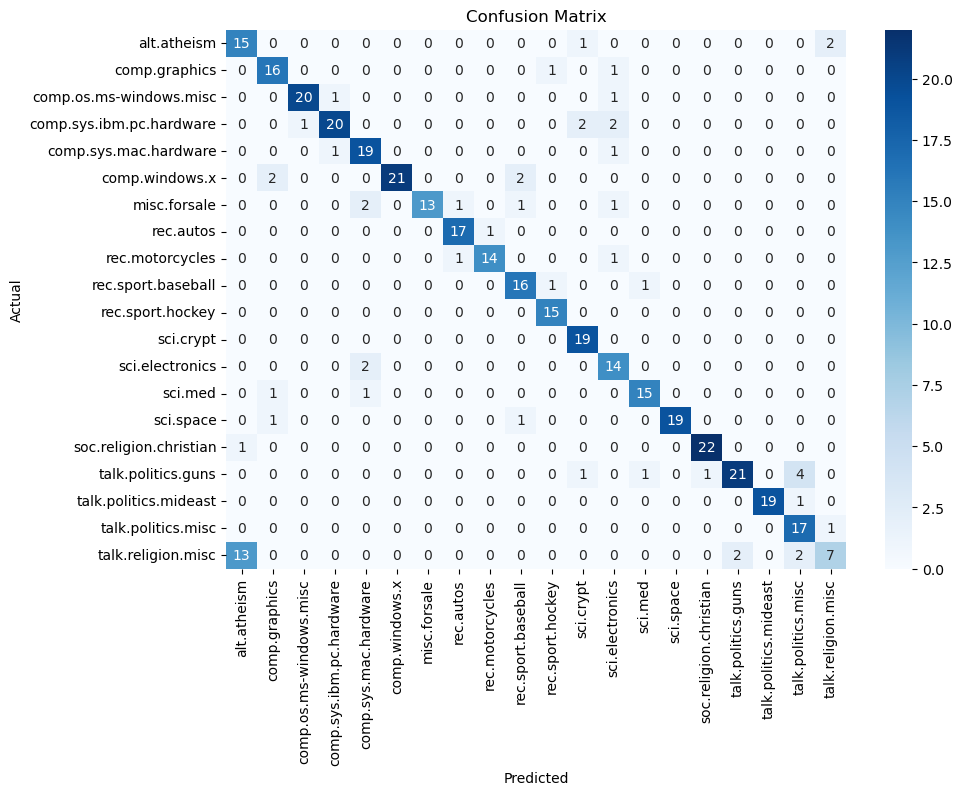

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [50]:
#3. Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already installed
nltk.download('vader_lexicon')

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] > 0:
        return 'Positive'
    elif sentiment_score['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment_vader)

# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Distribution:
Positive    1334
Negative     631
Neutral       35
Name: Sentiment, dtype: int64


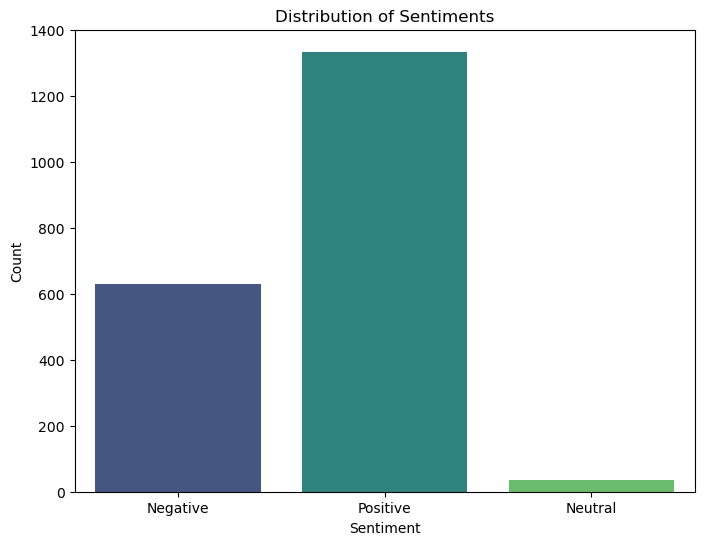

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [52]:
#4. Evaluation
# Sentiment by Category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print("\nSentiment Distribution by Category:")
print(sentiment_by_category)



Sentiment Distribution by Category:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      0.0  

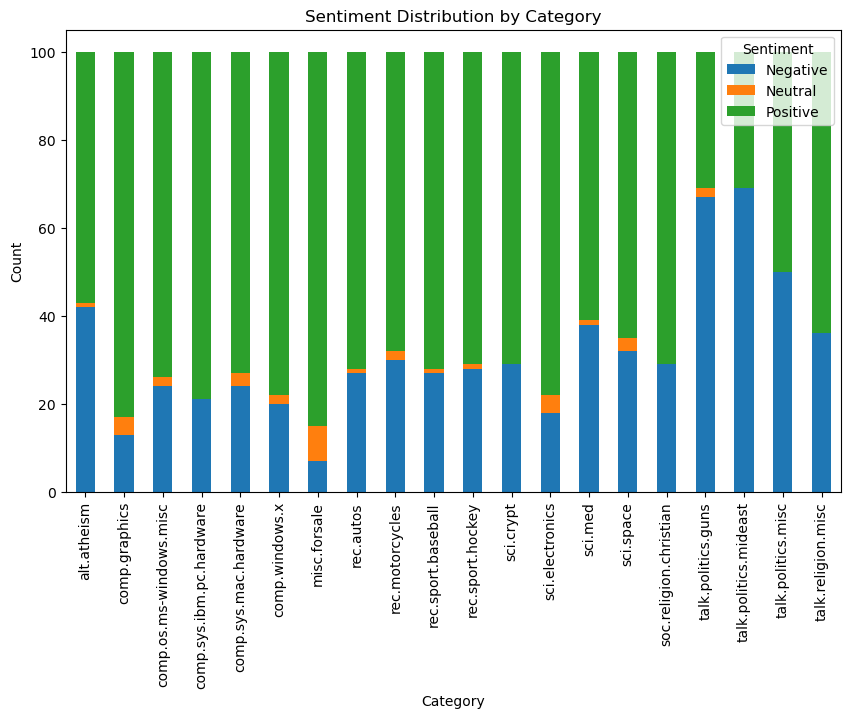

In [53]:
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
